In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle 
import mlflow

In [2]:
path = r"D:\Data science Course\My projects\Amazon_delivery\amazon_delivery.csv"

In [3]:
df = pd.read_csv(path)
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

<Axes: ylabel='Agent_Rating'>

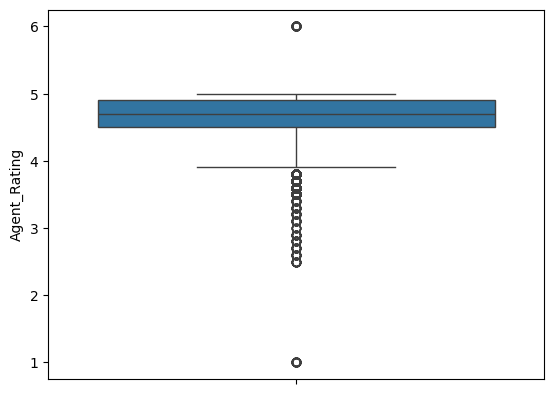

In [6]:
sns.boxplot(df['Agent_Rating'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


In [8]:
df['Agent_Rating'] = df['Agent_Rating'].fillna(df['Agent_Rating'].median())

In [9]:
df.isna().sum()

Order_ID            0
Agent_Age           0
Agent_Rating        0
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [10]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])

In [11]:
df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
dtype: int64

In [12]:
df.sample(5)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
12699,cbpk703840686,26,4.9,18.562450,73.916619,18.632450,73.986619,2022-03-18,23:50:00,00:00:00,Stormy,Low,motorcycle,Metropolitian,85,Shoes
29163,orrl873139418,23,5.0,23.232537,77.429845,23.302537,77.499845,2022-02-18,17:10:00,17:20:00,Sunny,Medium,motorcycle,Urban,145,Clothing
20224,fmoo224494079,31,5.0,12.935662,77.614130,13.015662,77.694130,2022-04-06,23:30:00,23:35:00,Stormy,Low,van,Metropolitian,130,Shoes
23326,zqva964466094,39,4.5,19.065838,72.832658,19.145838,72.912658,2022-03-29,17:20:00,17:25:00,Sunny,Medium,motorcycle,Metropolitian,140,Pet Supplies
7699,qwqq977308565,20,4.6,23.357804,85.325146,23.437804,85.405146,2022-03-20,18:50:00,19:00:00,Stormy,Medium,motorcycle,Metropolitian,20,Grocery


In [13]:
lat_1 = np.radians(df['Store_Latitude'])
lat_2 =np.radians(df['Drop_Latitude'])

long_1 =np.radians(df['Store_Longitude'])
long_2 =np.radians(df['Drop_Longitude'])

dlat = lat_1 - lat_2
dlong = long_1 - long_2

a = np.sin(dlat/2)**2 + np.cos(lat_1) * np.cos(lat_2) * np.sin(dlong/2)**2
c = 2 * np.arcsin(np.sqrt(a))
r = 6371
    
 # Distance in kilometers
df['Distance'] = c * r



In [14]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138


In [15]:
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format = '%H:%M:%S', errors= 'coerce')
df['Order_hour'] = df['Order_Time'].dt.hour

df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format = '%H:%M:%S', errors = 'coerce')
df['Pickup_hour'] = df['Pickup_Time'].dt.hour

df['Order_Date'] = pd.to_datetime(df['Order_Date'], format = '%Y-%m-%d', errors = 'coerce')
df['Order_day'] = df['Order_Date'].dt.day_name()

In [16]:
df.isna().sum()

Order_ID            0
Agent_Age           0
Agent_Rating        0
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time         91
Pickup_Time         0
Weather             0
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
Distance            0
Order_hour         91
Pickup_hour         0
Order_day           0
dtype: int64

In [17]:
df['Order_hour'] = df['Order_hour'].fillna(df['Order_hour'].median())

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43739 non-null  object        
 1   Agent_Age        43739 non-null  int64         
 2   Agent_Rating     43739 non-null  float64       
 3   Store_Latitude   43739 non-null  float64       
 4   Store_Longitude  43739 non-null  float64       
 5   Drop_Latitude    43739 non-null  float64       
 6   Drop_Longitude   43739 non-null  float64       
 7   Order_Date       43739 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  datetime64[ns]
 9   Pickup_Time      43739 non-null  datetime64[ns]
 10  Weather          43739 non-null  object        
 11  Traffic          43739 non-null  object        
 12  Vehicle          43739 non-null  object        
 13  Area             43739 non-null  object        
 14  Delivery_Time    43739 non-null  int64

In [19]:
df.isna().sum()

Order_ID            0
Agent_Age           0
Agent_Rating        0
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time         91
Pickup_Time         0
Weather             0
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
Distance            0
Order_hour          0
Pickup_hour         0
Order_day           0
dtype: int64

In [20]:
df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance,Order_hour,Pickup_hour,Order_day
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,1900-01-01 11:30:00,1900-01-01 11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,11.0,11,Saturday
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,1900-01-01 19:45:00,1900-01-01 19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,19.0,19,Friday
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,1900-01-01 08:30:00,1900-01-01 08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,8.0,8,Saturday
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,1900-01-01 18:00:00,1900-01-01 18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,18.0,18,Tuesday
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,1900-01-01 13:30:00,1900-01-01 13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,13.0,13,Saturday


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43739 non-null  object        
 1   Agent_Age        43739 non-null  int64         
 2   Agent_Rating     43739 non-null  float64       
 3   Store_Latitude   43739 non-null  float64       
 4   Store_Longitude  43739 non-null  float64       
 5   Drop_Latitude    43739 non-null  float64       
 6   Drop_Longitude   43739 non-null  float64       
 7   Order_Date       43739 non-null  datetime64[ns]
 8   Order_Time       43648 non-null  datetime64[ns]
 9   Pickup_Time      43739 non-null  datetime64[ns]
 10  Weather          43739 non-null  object        
 11  Traffic          43739 non-null  object        
 12  Vehicle          43739 non-null  object        
 13  Area             43739 non-null  object        
 14  Delivery_Time    43739 non-null  int64

In [22]:
df = df.drop(['Order_ID', 'Store_Latitude', 'Store_Longitude','Drop_Latitude','Drop_Longitude','Order_Date','Order_Time','Pickup_Time'], axis= 1)

In [23]:
df.head()

,Agent_Age,Agent_Rating,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance,Order_hour,Pickup_hour,Order_day
0,37,4.9,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,11.0,11,Saturday
1,34,4.5,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,19.0,19,Friday
2,23,4.4,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,8.0,8,Saturday
3,38,4.7,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,18.0,18,Tuesday
4,32,4.6,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,13.0,13,Saturday


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Agent_Age      43739 non-null  int64  
 1   Agent_Rating   43739 non-null  float64
 2   Weather        43739 non-null  object 
 3   Traffic        43739 non-null  object 
 4   Vehicle        43739 non-null  object 
 5   Area           43739 non-null  object 
 6   Delivery_Time  43739 non-null  int64  
 7   Category       43739 non-null  object 
 8   Distance       43739 non-null  float64
 9   Order_hour     43739 non-null  float64
 10  Pickup_hour    43739 non-null  int32  
 11  Order_day      43739 non-null  object 
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 3.8+ MB


In [25]:
df = pd.get_dummies(df, columns= ['Weather', 'Traffic','Vehicle','Area','Order_day','Category'])

In [26]:
df.head()

,Agent_Age,Agent_Rating,Delivery_Time,Distance,Order_hour,Pickup_hour,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,Weather_Stormy,...,Category_Home,Category_Jewelry,Category_Kitchen,Category_Outdoors,Category_Pet Supplies,Category_Shoes,Category_Skincare,Category_Snacks,Category_Sports,Category_Toys
0,37,4.9,120,3.025149,11.0,11,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,34,4.5,165,20.183530,19.0,19,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,23,4.4,130,1.552758,8.0,8,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,38,4.7,105,7.790401,18.0,18,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,32,4.6,150,6.210138,13.0,13,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [27]:
x = df.drop(['Delivery_Time'], axis= 1)
x.head()

,Agent_Age,Agent_Rating,Distance,Order_hour,Pickup_hour,Weather_Cloudy,Weather_Fog,Weather_Sandstorms,Weather_Stormy,Weather_Sunny,...,Category_Home,Category_Jewelry,Category_Kitchen,Category_Outdoors,Category_Pet Supplies,Category_Shoes,Category_Skincare,Category_Snacks,Category_Sports,Category_Toys
0,37,4.9,3.025149,11.0,11,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,34,4.5,20.183530,19.0,19,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,23,4.4,1.552758,8.0,8,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,38,4.7,7.790401,18.0,18,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,32,4.6,6.210138,13.0,13,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [28]:
y = df['Delivery_Time']
y.head()

0    120
1    165
2    130
3    105
4    150
Name: Delivery_Time, dtype: int64

In [29]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=42)

In [30]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [31]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [32]:
print('R2 score of Train', r2_score(y_train, y_pred_train))

R2 score of Train 0.9731978234014349


In [33]:
print('R2 score of Test', r2_score(y_test, y_pred_test))

R2 score of Test 0.8056617536307005


In [34]:
location = r"D:\Data science Course\My projects\Amazon_delivery\Random forest\Random_forest_model.pkl"
##with open(location, 'wb') as file:
    pickle.dump(model, file)

IndentationError: unexpected indent (810620523.py, line 3)

In [ ]:
x.columns

In [40]:
with mlflow.start_run(run_name = 'Random model'):
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    mlflow.log_param('model', 'RandomForestRegressor')
    
    mlflow.log_metric('r2 score_train', r2_score(y_train, y_pred_train))
    mlflow.log_metric("mse_train", mean_squared_error(y_train, y_pred_train))
    mlflow.log_metric('mae_train', mean_absolute_error(y_train, y_pred_train))

    mlflow.log_metric('r2 score_test', r2_score(y_test, y_pred_test))
    mlflow.log_metric("mse_test", mean_squared_error(y_test, y_pred_test))
    mlflow.log_metric('mae_test', mean_absolute_error(y_test, y_pred_test))
    mlflow.sklearn.log_model(model, 'Random model')
    



2025/05/04 12:06:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
